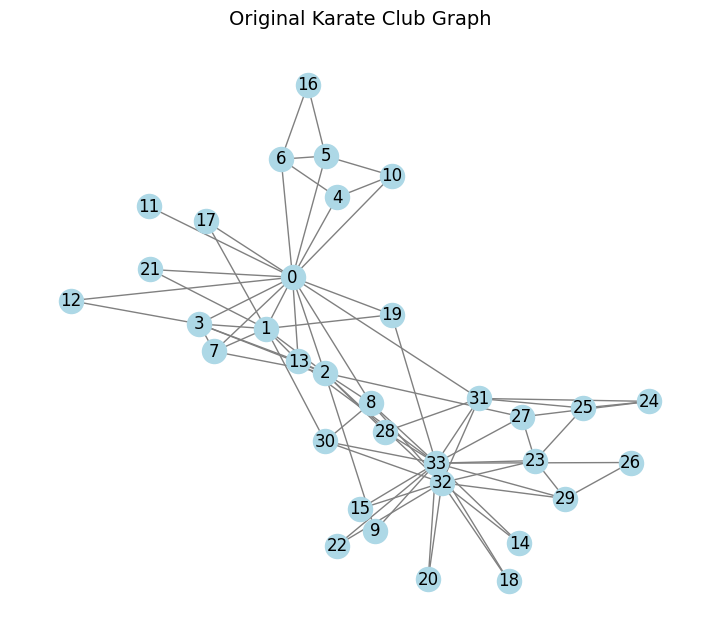

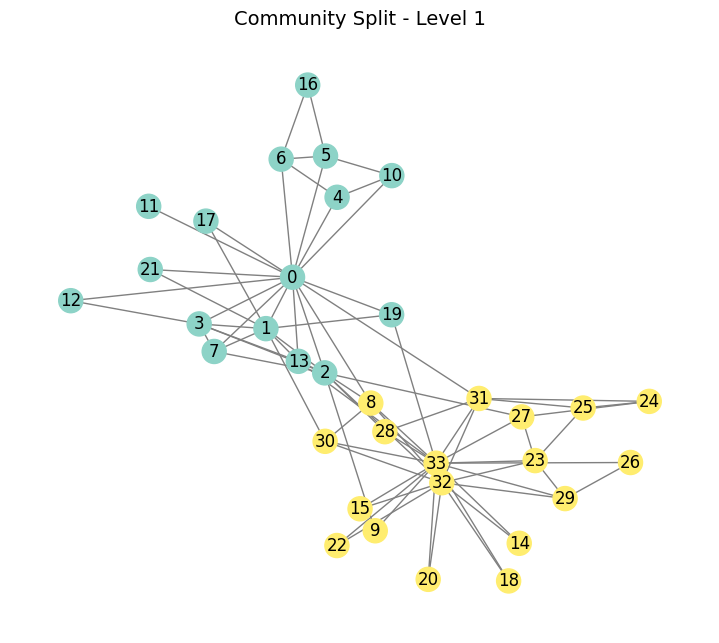

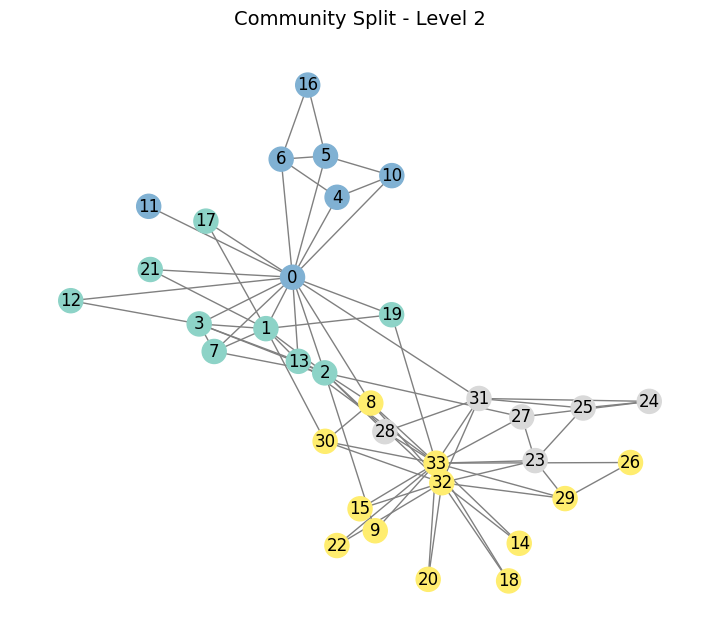

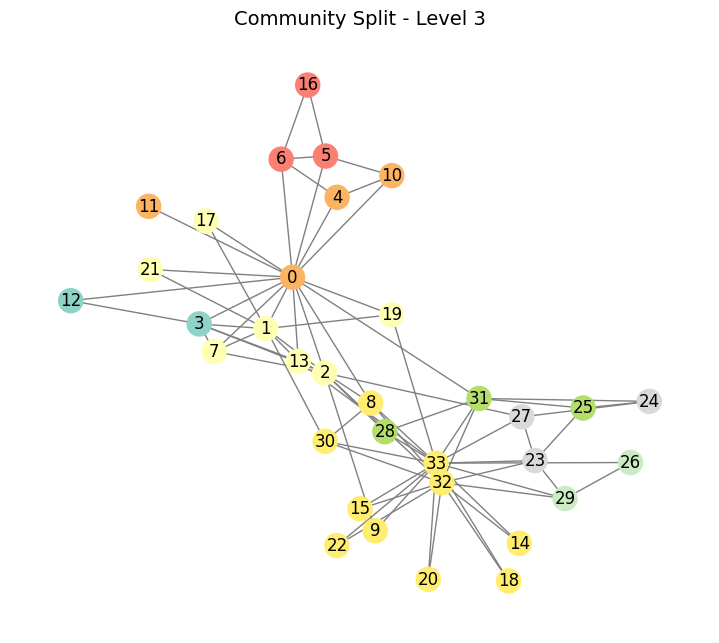


✅ Final detected communities: 8 groups

Node | Degree | Betweenness | Closeness | Clustering
------------------------------------------------------
   0 |  0.485 |      0.438 |     0.569 |      0.150
   1 |  0.273 |      0.054 |     0.485 |      0.333
   2 |  0.303 |      0.144 |     0.559 |      0.244
   3 |  0.182 |      0.012 |     0.465 |      0.667
   4 |  0.091 |      0.001 |     0.379 |      0.667
   5 |  0.121 |      0.030 |     0.384 |      0.500
   6 |  0.121 |      0.030 |     0.384 |      0.500
   7 |  0.121 |      0.000 |     0.440 |      1.000
   8 |  0.152 |      0.056 |     0.516 |      0.500
   9 |  0.061 |      0.001 |     0.434 |      0.000
  10 |  0.091 |      0.001 |     0.379 |      0.667
  11 |  0.030 |      0.000 |     0.367 |      0.000
  12 |  0.061 |      0.000 |     0.371 |      1.000
  13 |  0.152 |      0.046 |     0.516 |      0.600
  14 |  0.061 |      0.000 |     0.371 |      1.000
  15 |  0.061 |      0.000 |     0.371 |      1.000
  16 |  0.061 |    

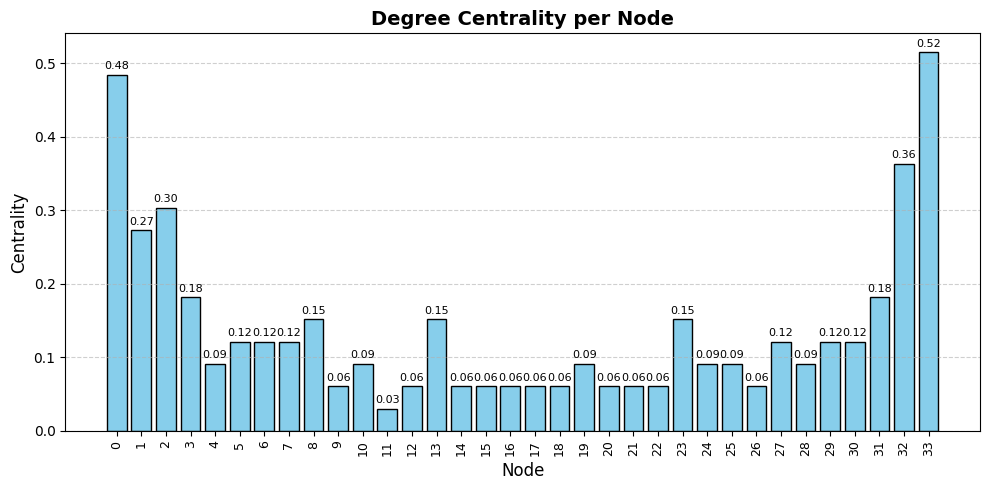

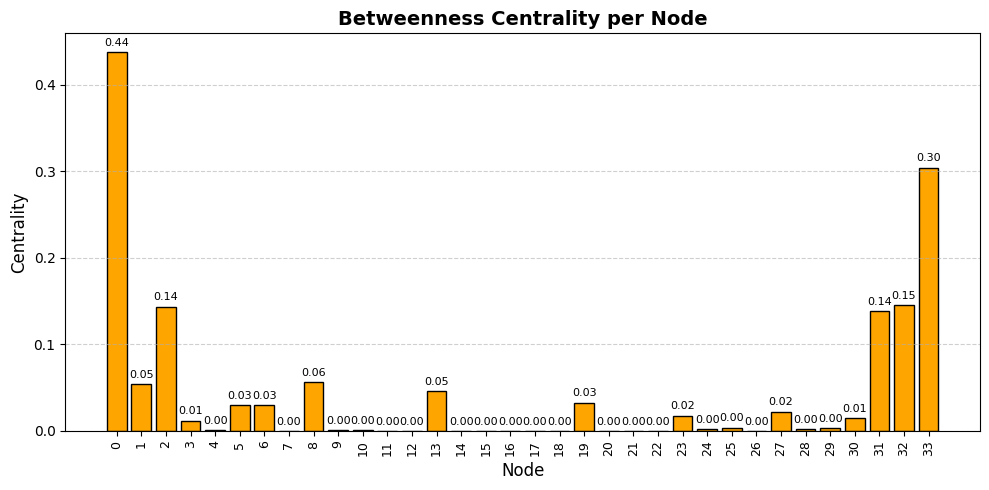

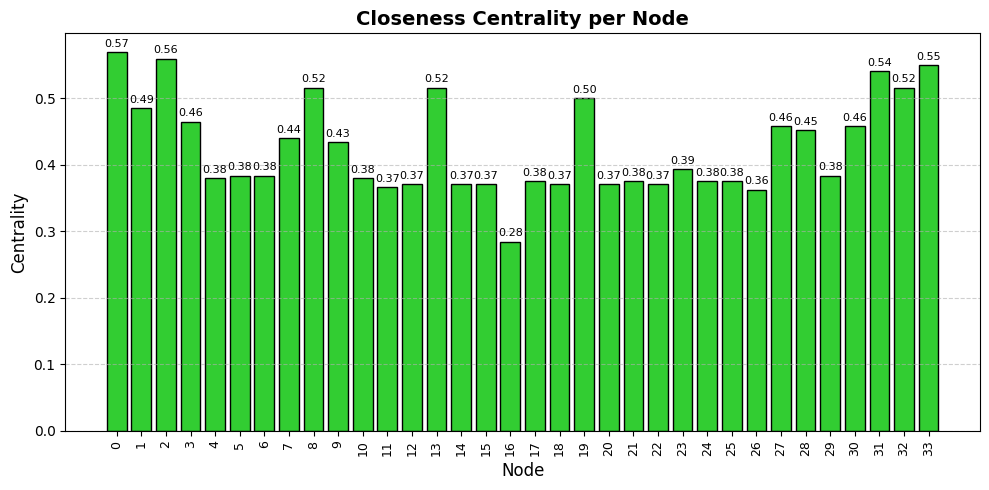

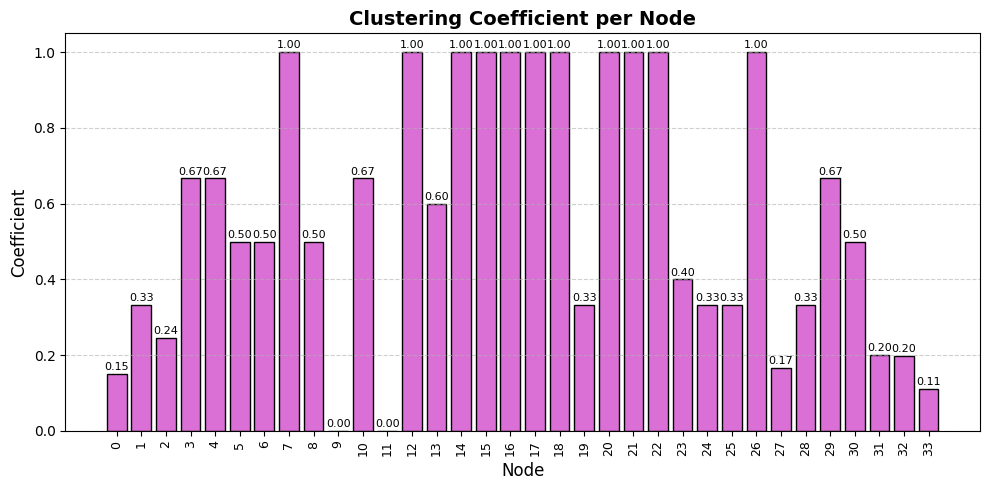


-----------------------------------------------------------
Discussion:

🔹 The recursive spectral modularity partitioning algorithm
   divides the Karate Club network into multiple cohesive
   communities by maximizing modularity.

🔹 Nodes 0 and 33 (the instructor and club president)
   have high centrality and act as connectors between clusters.

🔹 Deeper recursive levels show how smaller, tightly connected
   subgroups form around these key individuals, reflecting
   real-world social divisions in the club.
-----------------------------------------------------------



In [30]:
# ============================================
# DSC212 - Recursive Spectral Modularity Partitioning
# Zachary’s Karate Club Graph
# ============================================

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# ================================
# Step 1: Load the Karate Club Graph
# ================================
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(7,6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Original Karate Club Graph", fontsize=14)
plt.show()

# ================================
# Step 2: Define Modularity and Split Functions
# ================================
def modularity_matrix(G):
    A = nx.to_numpy_array(G)
    k = A.sum(axis=1)
    m = A.sum() / 2
    B = A - np.outer(k, k) / (2 * m)
    return B, m

def spectral_split(G):
    B, m = modularity_matrix(G)
    eigvals, eigvecs = np.linalg.eigh(B)
    leading = eigvecs[:, np.argmax(eigvals)]
    s = np.sign(leading)
    Q = (1 / (4 * m)) * s @ B @ s
    if Q <= 0:
        return [list(G.nodes())]
    group1 = [node for node, val in zip(G.nodes(), s) if val >= 0]
    group2 = [node for node, val in zip(G.nodes(), s) if val < 0]
    return [group1, group2]

def recursive_partition(G, depth=0, max_depth=3):
    if depth >= max_depth:
        return [list(G.nodes())]
    parts = spectral_split(G)
    if len(parts) == 1:
        return parts
    result = []
    for p in parts:
        sub = G.subgraph(p)
        if sub.number_of_nodes() <= 3:
            result.append(list(sub.nodes()))
        else:
            result.extend(recursive_partition(sub, depth+1, max_depth))
    return result

# ================================
# Step 3: Visualize Recursive Partitioning Process
# ================================
def plot_communities(G, communities, title):
    color_map = {}
    for i, comm in enumerate(communities):
        for node in comm:
            color_map[node] = i
    colors = [color_map[n] for n in G.nodes()]
    plt.figure(figsize=(7,6))
    nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.Set3, edge_color='gray')
    plt.title(title, fontsize=14)
    plt.show()

G_copy = G.copy()
levels = []
current_communities = [list(G_copy.nodes())]
levels.append(current_communities)

for i in range(3):  # up to 3 recursive splits
    next_level = []
    for comm in current_communities:
        subG = G_copy.subgraph(comm)
        parts = spectral_split(subG)
        if len(parts) > 1:
            next_level.extend(parts)
        else:
            next_level.append(comm)
    current_communities = next_level
    levels.append(current_communities)
    plot_communities(G_copy, current_communities, f"Community Split - Level {i+1}")

# ================================
# Step 4: Final Communities and Node Metrics
# ================================
final_communities = levels[-1]
print(f"\n✅ Final detected communities: {len(final_communities)} groups\n")

degree_c = nx.degree_centrality(G)
between_c = nx.betweenness_centrality(G)
close_c = nx.closeness_centrality(G)
cluster_c = nx.clustering(G)

print("Node | Degree | Betweenness | Closeness | Clustering")
print("------------------------------------------------------")
for node in G.nodes():
    print(f"{node:>4} | {degree_c[node]:>6.3f} | {between_c[node]:>10.3f} | {close_c[node]:>9.3f} | {cluster_c[node]:>10.3f}")

# ================================
# Step 5: Enhanced Metric Bar Charts
# ================================
def fancy_bar_plot(metric_dict, color, title, ylabel):
    plt.figure(figsize=(10,5))
    nodes = list(metric_dict.keys())
    values = list(metric_dict.values())
    bars = plt.bar(nodes, values, color=color, edgecolor='black')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel("Node", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(nodes, rotation=90, fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Annotate bars with values
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f"{height:.2f}",
                 ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()

# Plot all metrics with different colors
fancy_bar_plot(degree_c, 'skyblue', "Degree Centrality per Node", "Centrality")
fancy_bar_plot(between_c, 'orange', "Betweenness Centrality per Node", "Centrality")
fancy_bar_plot(close_c, 'limegreen', "Closeness Centrality per Node", "Centrality")
fancy_bar_plot(cluster_c, 'orchid', "Clustering Coefficient per Node", "Coefficient")

# ================================
# Step 6: Discussion
# ================================
print("""
-----------------------------------------------------------
Discussion:

🔹 The recursive spectral modularity partitioning algorithm
   divides the Karate Club network into multiple cohesive
   communities by maximizing modularity.

🔹 Nodes 0 and 33 (the instructor and club president)
   have high centrality and act as connectors between clusters.

🔹 Deeper recursive levels show how smaller, tightly connected
   subgroups form around these key individuals, reflecting
   real-world social divisions in the club.
-----------------------------------------------------------
""")
